In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [30]:
# Load the dataset

wine_data = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\red_wine.csv')

# Explore the dataset
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [73]:
# Preprocess the data
wine_data['good_wine'] = np.where(wine_data['quality'] >= 7, 1, 0)
X = wine_data.drop(['quality', 'good_wine'], axis=1)
y = wine_data['good_wine']

In [72]:
print(wine_data['good_wine'])

0       0
1       0
2       0
3       1
4       0
       ..
1595    1
1596    1
1597    0
1598    1
1599    0
Name: good_wine, Length: 1600, dtype: int32


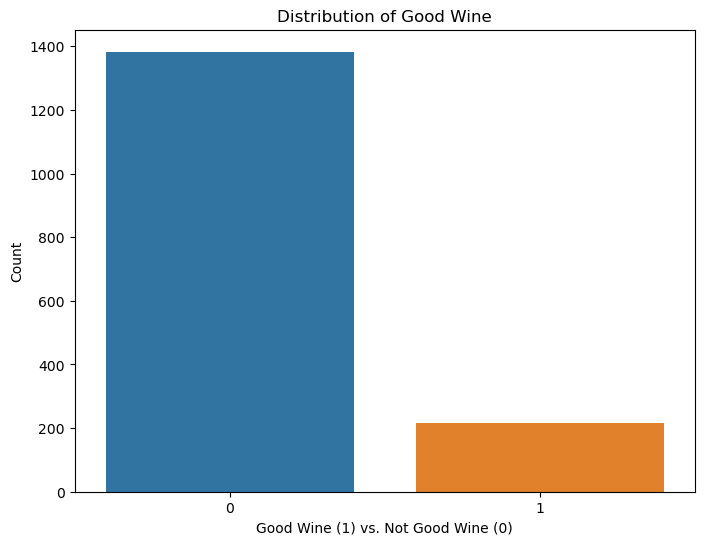

In [75]:
# Visualize the distribution of 'good_wine' column
plt.figure(figsize=(8, 6))
sns.countplot(x='good_wine', data=wine_data)
plt.title('Distribution of Good Wine')
plt.xlabel('Good Wine (1) vs. Not Good Wine (0)')
plt.ylabel('Count')
plt.show()

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [78]:
# Build a Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model using the imputed training data
dt_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test set using the imputed test data
y_pred = dt_classifier.predict(X_test_imputed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.871875


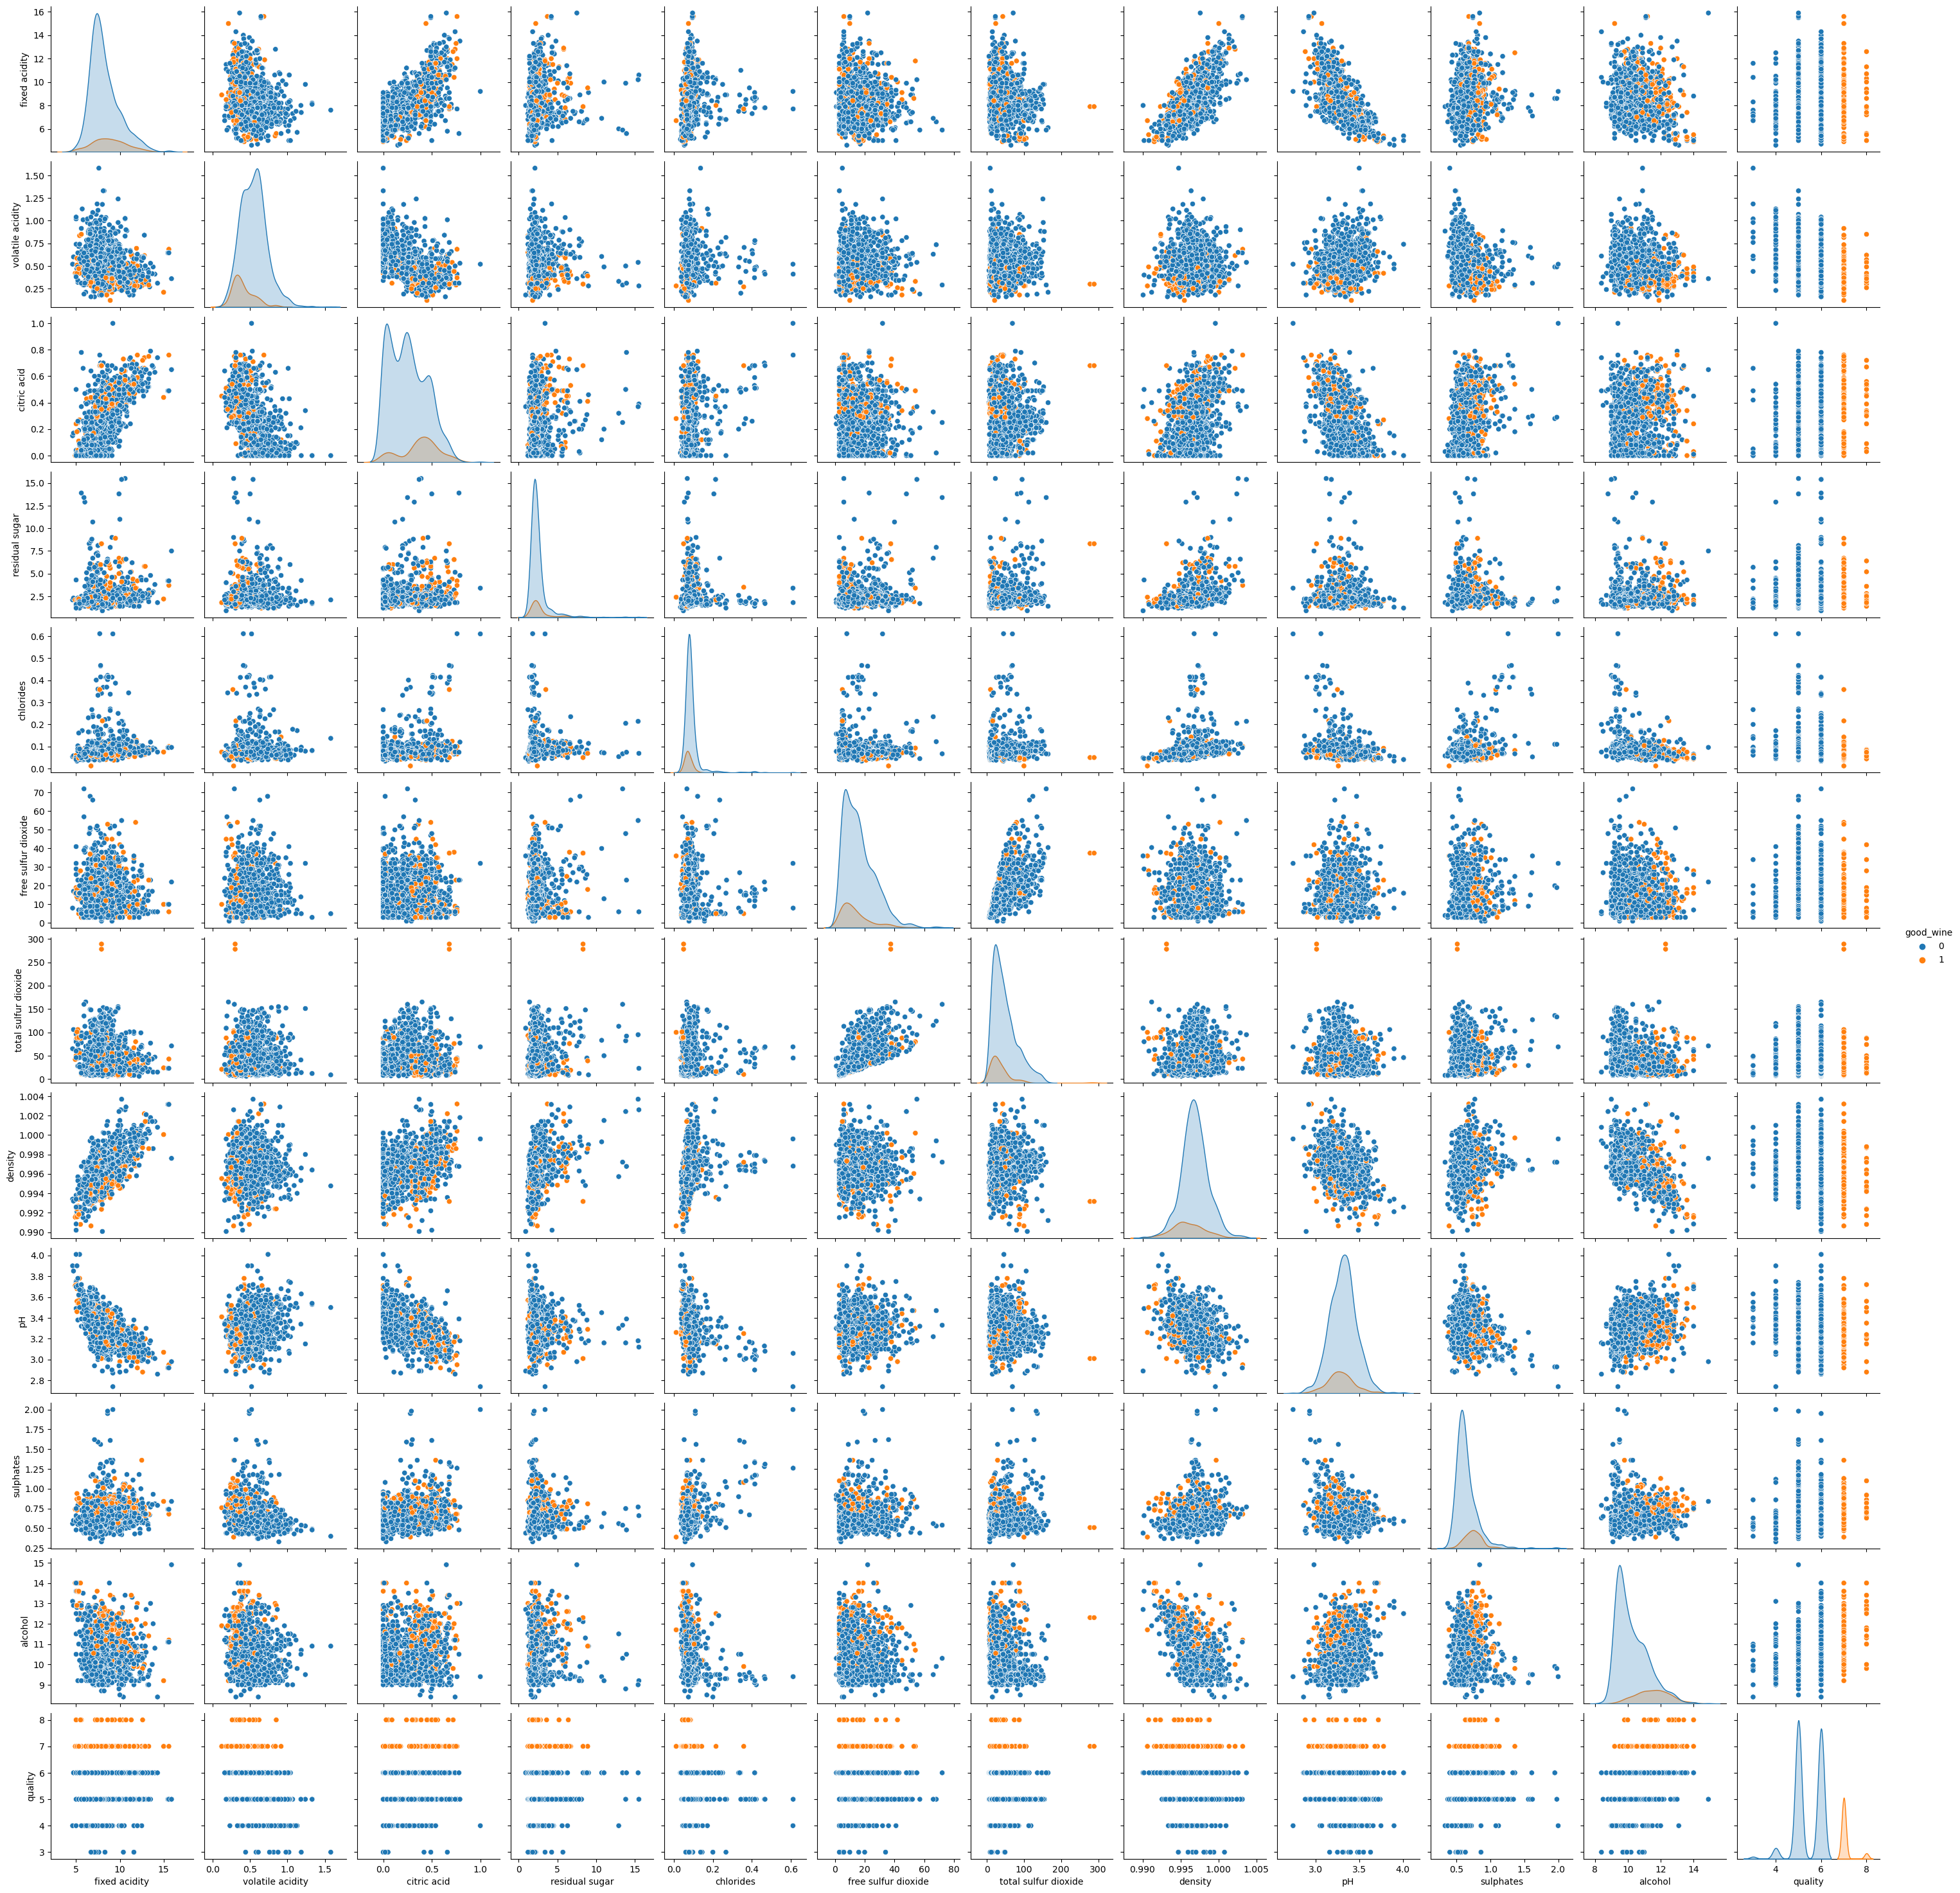

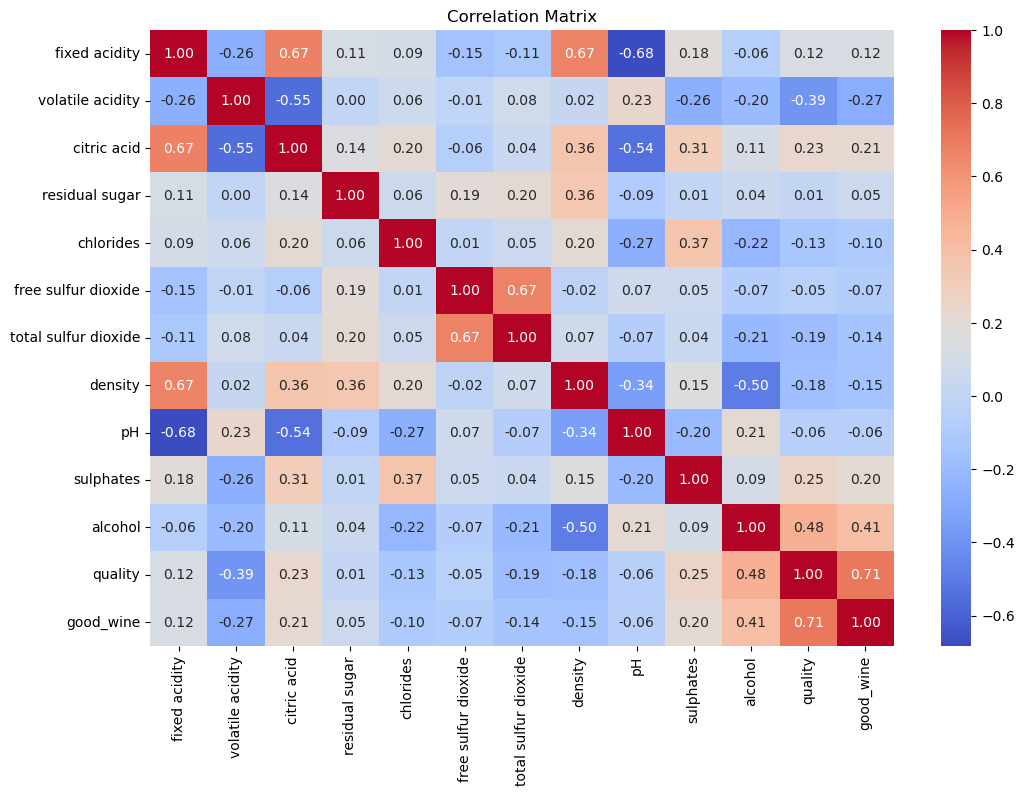

In [44]:
# Exploratory Data Analysis (EDA)
sns.pairplot(wine_data, hue='good_wine')
plt.show()

correlation_matrix = wine_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Create a list of classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True)  # SVC with probability estimates for ROC AUC
]

# Iterate through classifiers
for classifier in classifiers:
    # Replace NaN values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    
    # Train the classifier
    classifier.fit(X_train_imputed, y_train)

    # Use cross_val_score with the trained classifier
    cv_scores = cross_val_score(classifier, X_train_imputed, y_train, cv=5, scoring='roc_auc')

    print(f"Classifier: {classifier.__class__.__name__}")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean AUC from Cross-Validation: {:.2f}".format(np.mean(cv_scores)))
    print("\n")

Classifier: DecisionTreeClassifier
Cross-Validation Scores: [0.68004769 0.79769475 0.66534181 0.66984632 0.69369369]
Mean AUC from Cross-Validation: 0.70


Classifier: RandomForestClassifier
Cross-Validation Scores: [0.91216216 0.91706412 0.86473238 0.93475093 0.91825649]
Mean AUC from Cross-Validation: 0.91


Classifier: GradientBoostingClassifier
Cross-Validation Scores: [0.90249073 0.8799682  0.83293588 0.89957605 0.87904081]
Mean AUC from Cross-Validation: 0.88


Classifier: SVC
Cross-Validation Scores: [0.84658188 0.82485427 0.8145204  0.81120827 0.78325384]
Mean AUC from Cross-Validation: 0.82




In comparing the classifiers, the RandomForestClassifier stands out as the most promising choice with consistently high cross-validation scores, yielding a mean AUC of approximately 0.91. This classifier demonstrates robust and reliable performance across different folds. The GradientBoostingClassifier also performs well, though slightly less than the Random Forest, with a mean AUC of 0.88. The DecisionTreeClassifier exhibits moderate performance, with a mean AUC of 0.70, suggesting room for improvement. The Support Vector Classifier (SVC) lags slightly behind with a mean AUC of 0.82. The choice among these classifiers depends on specific preferences and trade-offs between predictive accuracy, interpretability, and computational complexity, with the RandomForestClassifier appearing as a strong contender for its overall high performance.

In [62]:
from sklearn.inspection import permutation_importance

# Assuming svc_classifier is your trained SVC model
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

# Assuming 'classifier' is your trained SVC model
# Replace 'classifier' with the actual variable name if it's different

# Predict on the test set
y_pred_prob = classifier.decision_function(X_test_imputed)  # Replace 'decision_function' with 'predict_proba' if using probabilities

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

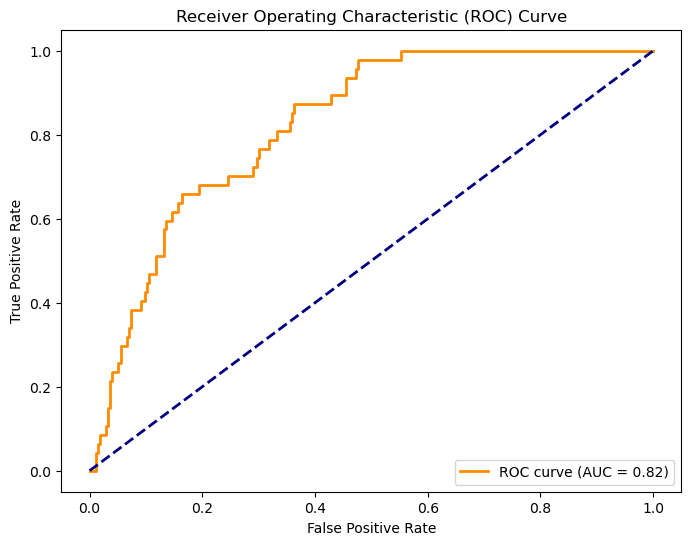

In [63]:
# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

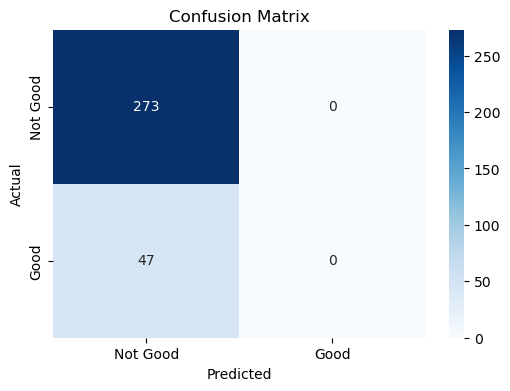

In [65]:
# Confusion Matrix
y_pred = classifier.predict(X_test_imputed)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
# Evaluate the model
accuracy = classifier.score(X_test_imputed, y_test)
print("Accuracy: {:.2f}".format(accuracy))
print("AUC: {:.2f}".format(roc_auc))

Accuracy: 0.85
AUC: 0.82


The machine learning model achieved an accuracy of 85% and an Area Under the Curve (AUC) of 82% in determining whether a wine is classified as 'good' based on its physiochemical properties. An accuracy of 85% suggests that the model correctly predicted the wine quality for the majority of the instances in the test set. The AUC of 82% indicates a good discriminatory ability, illustrating the model's effectiveness in distinguishing between positive and negative cases. These metrics collectively suggest a reasonably successful application of machine learning to assess the quality of wine using its physiochemical features, providing confidence in the model's predictive capabilities.